# **Janken* Image Classifier**

# Thifal Nurrifqi Ariel Kurniawan

---
*Janken is rock-paper-scissors in japan

Written by myself, inspired from many sources, Thank You.

Presented for Dicoding Submission on 'Belajar Machine Learning Untuk Pemula" course.

# Utensil Preparation

In [ ]:
#@title Import the Library and Modules {vertical-output : true}
!pip install split_folders style tqdm

import os, split_folders, zipfile, style, tqdm
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from google.colab import files

print('Tensorflow Version : ' + tf.__version__)
print('Libraries and Modules imported!')

Tensorflow Version : 2.2.0
Libraries and Modules imported!


Using TensorFlow backend.


In [ ]:
#@title Import and unzip the Dataset {vertical-output : true}
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
-O /tmp/rockpaperscissors.zip

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

print('Imported and Unzipped!')

--2020-07-01 12:17:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.01MB/s    in 44s     

2020-07-01 12:18:18 (7.00 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]

Imported and Unzipped!


# Data Preparation

In [ ]:
#@title Split Classes Folder to Train, Validation, and Test folder
split_folders.ratio('/tmp/rockpaperscissors/rps-cv-images', 
                    output="/tmp/janken", 
                    seed=1337, ratio=(.8, .2))
split_folders.list_dirs('/tmp/janken')

Copying files: 2188 files [00:00, 2340.17 files/s]


[PosixPath('/tmp/janken/train'),
 PosixPath('/tmp/janken/val'),
 PosixPath('/tmp/janken/test')]

In [ ]:
#@title Understanding the Data { vertical-output:true }
train_rock = len(os.listdir('/tmp/janken/train/rock'))
train_paper = len(os.listdir('/tmp/janken/train/paper'))
train_scissors = len(os.listdir('/tmp/janken/train/scissors'))
total_train = train_rock + train_paper + train_scissors

val_rock = len(os.listdir('/tmp/janken/val/rock'))
val_paper = len(os.listdir('/tmp/janken/val/paper'))
val_scissors = len(os.listdir('/tmp/janken/val/scissors'))
total_val = val_rock + val_paper + val_scissors

total_data = total_train + total_val
total_rock = train_rock + val_rock
total_paper = train_paper + val_paper
total_scissors = train_scissors + val_scissors

print(style.blue(style.bold('Data Information')))
print(style.blue('================== \n \n'))

print('Train Data : ', total_train, 'images')
print('Rock : ', train_rock, 'images')
print('Paper : ', train_paper, 'images')
print('Scissors : ', train_scissors, 'images \n')

print('Validation Data : ', total_val, 'images')
print('Rock : ', val_rock, 'images')
print('Paper : ', val_paper, 'images')
print('Scissors : ', val_scissors, 'images \n')

print('Total Rock Images :', total_rock)
print('Total Paper Images :', total_paper)
print('Total Scissors Images :', total_scissors)
print('Total Image Data : ', total_data)
print('Data Screening Completed!' '\n' 'Continue to next step..')

Data Information
 

Train Data :  1749 images
Rock :  580 images
Paper :  569 images
Scissors :  600 images 

Validation Data :  439 images
Rock :  146 images
Paper :  143 images
Scissors :  150 images 

Total Rock Images : 726
Total Paper Images : 712
Total Scissors Images : 750
Total Image Data :  2188
Data Screening Completed!
Continue to next step..


In [ ]:
#@title Image Augmentation Generator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.3,
                                   zoom_range=0.4,
                                   rotation_range=90,
                                   fill_mode='nearest',
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
#@title Image Augmentation

train_dir = '/tmp/janken/train'
val_dir = '/tmp/janken/val'

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=144,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=72,
        class_mode='categorical')

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


In [ ]:
#@title Model Building

model = tf.keras.models.Sequential(
    [
      tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(640, activation='relu'),
      tf.keras.layers.Dense(3, activation=tf.nn.softmax)
    ]
)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print('Model building and compiling completed!')

Model building and compiling completed!


In [ ]:
#@title Model Summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)       

# Model Training

In [ ]:
#@title Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples//val_generator.batch_size,
    verbose=1
)

Epoch 1/20
12/12 [==============================] - 37s 3s/step - loss: 1.1432 - accuracy: 0.3682 - val_loss: 1.0646 - val_accuracy: 0.5347
Epoch 2/20
12/12 [==============================] - 37s 3s/step - loss: 1.0200 - accuracy: 0.4997 - val_loss: 0.9448 - val_accuracy: 0.5324
Epoch 3/20
12/12 [==============================] - 37s 3s/step - loss: 0.9477 - accuracy: 0.5589 - val_loss: 0.9454 - val_accuracy: 0.5625
Epoch 4/20
12/12 [==============================] - 37s 3s/step - loss: 0.8866 - accuracy: 0.5919 - val_loss: 0.8609 - val_accuracy: 0.6551
Epoch 5/20
12/12 [==============================] - 38s 3s/step - loss: 0.7701 - accuracy: 0.7128 - val_loss: 0.8074 - val_accuracy: 0.6366
Epoch 6/20
12/12 [==============================] - 41s 3s/step - loss: 0.6261 - accuracy: 0.7813 - val_loss: 0.5906 - val_accuracy: 0.7870
Epoch 7/20
12/12 [==============================] - 37s 3s/step - loss: 0.5426 - accuracy: 0.7988 - val_loss: 0.5448 - val_accuracy: 0.8380
Epoch 8/20
12/12 [==

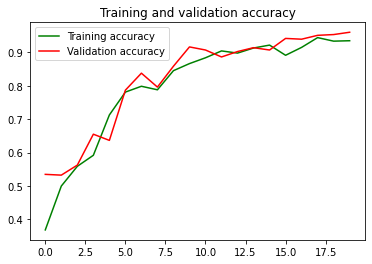

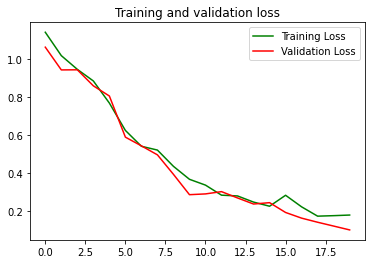

In [ ]:
#@title Training Result Visualization
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Testing and Predicting using the model

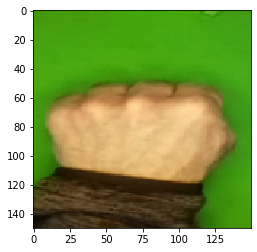

Rock
[0. 1. 0.]


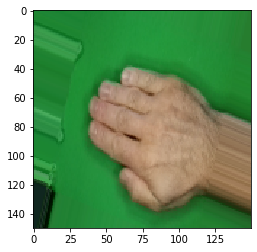

Paper
[1. 0. 0.]


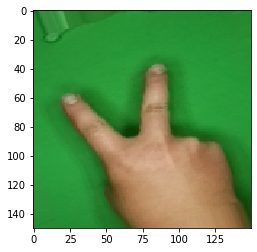

Scissors
[0. 0. 1.]


In [ ]:
#@title Label Preview { vertical-output: true }

for sampel in range(3):
  gambar, kode = train_generator.next()
  plt.imshow(gambar[0], interpolation='nearest')
  plt.show()
  if kode[0][0]==1:
    print('Paper')
  elif kode[0][1]==1:
    print('Rock')
  else:
    print('Scissors')
  print(kode[0])



In [ ]:
#@title Testing Model {vertical-output:true}

print('Test Model Using Validation Data Directory')
print('Test session for :', style.blue('Scissors'))
path = os.listdir('/tmp/janken/val/scissors')

for gambar in path:
 
  # predicting images
  path = '/tmp/janken/val/scissors/' + gambar
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  #print(classes)
  if(classes[0][2] >= 0.5):
    print(gambar + ": " + "Scissors ")
  else :
    print(gambar + ": " + "Not Scissors ")
  

Test Model Using Validation Data Directory
Test session for : Scissors
VRUsuwjXjZtW1Kaj.png: Scissors 
yxCsGCXdJ0UuGEol.png: Scissors 
64ktckSF0c26K6AY.png: Scissors 
XBP2RvuuQk5EMXsW.png: Scissors 
jrogjyPvn83c1ZRy.png: Scissors 
pjOgxx8uZf2XPDFu.png: Scissors 
LFzPbXpksRrG9jpF.png: Scissors 
tHvKVZRQUsqNt0g4.png: Scissors 
wjpTy95PqKpcRg9o.png: Scissors 
syu2UUmhELg3nol9.png: Scissors 
4z7r8yUDFk3HwEgN.png: Scissors 
CO4Xhg1dx5dmvwlo.png: Scissors 
6ZAZiGMRp4VD1hDD.png: Scissors 
qEeUSbz2Np2Qin0G.png: Scissors 
oneWMcLqF5aVRqz8.png: Not Scissors 
fNhHWQTLa9YBoIo2.png: Scissors 
U548QDFNMOTUq5nN.png: Scissors 
55yz6JI9f5DTbq9D.png: Scissors 
tPxruYoQszERdzTA.png: Scissors 
2DEYFsJ27UgVqv3W.png: Scissors 
WGm4eYxzwqkTKaQs.png: Scissors 
Eolm0Lo5dzVwDYqB.png: Scissors 
EBh8bZgOANio5kQw.png: Scissors 
3sHqqD2BAKmQp4dk.png: Scissors 
1vQCX4af6hQmuwxZ.png: Scissors 
ejWJ6Ber6qqXnuag.png: Scissors 
GgA8wrylOr4pvJhZ.png: Scissors 
XNsF8hyn9RBUaFnw.png: Scissors 
FAgOt7E8exiEn1fa.png: Scissor

Saving 1mnAKQCHEDbtjPX2.png to 1mnAKQCHEDbtjPX2.png
1mnAKQCHEDbtjPX2.png
Confirmed as Rock
[0. 1. 0.]


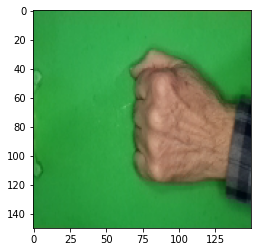

In [ ]:
#@title Upload here to predict! 
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  sumber = fn
  img = image.load_img(sumber, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)

  if classes[0][0]==1:
    print('Confirmed as Paper')
  elif classes[0][1]==1:
    print('Confirmed as Rock')
  else:
    print('Absolutely Scissors')
  
  print(classes[0])